In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pkg_resources

import nltk
from wordcloud import WordCloud

from gensim.models import Word2Vec
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
nltk.download ('punkt')
nltk.download ('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import spacy
import torch
from transformers import BertTokenizer, BertModel
import torch
import umap
from sklearn.metrics import mutual_info_score

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# print all the imported libs
installed_packages = pkg_resources.working_set
installed_packages_list = sorted(["%s==%s" % (i.key, i.version) for i in installed_packages])
for m in installed_packages_list:
    print(m)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_44252\125539095.py:5: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
d:\Python_Environment\Anaconda3\envs\EODP-2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update j

annotated-types==0.6.0
asttokens==2.4.1
blis==0.7.11
catalogue==2.0.10
certifi==2024.2.2
charset-normalizer==3.3.2
click==8.1.7
cloudpathlib==0.16.0
colorama==0.4.6
comm==0.2.2
confection==0.1.4
contourpy==1.2.0
cycler==0.11.0
cymem==2.0.8
debugpy==1.8.1
decorator==5.1.1
en-core-web-md==3.7.1
en-core-web-sm==3.7.1
exceptiongroup==1.2.0
executing==2.0.1
filelock==3.14.0
fonttools==4.51.0
fsspec==2024.3.1
fuzzywuzzy==0.18.0
gensim==4.3.2
huggingface-hub==0.22.2
idna==3.7
imageio==2.34.1
importlib-metadata==7.1.0
intel-openmp==2021.4.0
ipykernel==6.29.3
ipython==8.22.2
jedi==0.19.1
jellyfish==0.11.2
jinja2==3.1.3
joblib==1.4.0
jupyter-client==8.6.1
jupyter-core==5.7.2
kiwisolver==1.4.4
langcodes==3.4.0
language-data==1.2.0
lazy-loader==0.4
levenshtein==0.25.1
lime==0.2.0.1
llvmlite==0.42.0
marisa-trie==1.1.0
markupsafe==2.1.3
matplotlib-inline==0.1.7
matplotlib==3.8.4
mkl-fft==1.3.8
mkl-random==1.2.4
mkl-service==2.4.0
mkl==2021.4.0
mpld3==0.5.9
mpmath==1.3.0
murmurhash==1.0.10
nest-async

# 1. Read Data

## 1.1. Read Data and Show the Head

In [4]:
# Load book data from the specified path and store it in the 'books' DataFrame
books = pd.read_csv("Data-Files\\BX-Books.csv")
# Load ratings data from the specified path and store it in the 'ratings' DataFrame
ratings = pd.read_csv("Data-Files\\BX-Ratings.csv")
# Load user data from the specified path and store it in the 'users' DataFrame
users = pd.read_csv("Data-Files\\BX-Users.csv")

# Display the first five rows of the 'books' DataFrame
display(books.head())
# Display the first five rows of the 'ratings' DataFrame
display(ratings.head())
# Display the first five rows of the 'users' DataFrame
display(users.head())



,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
3,0440234743,The Testament,John Grisham,1999,Dell
4,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume


,User-ID,ISBN,Book-Rating
0,276744,038550120X,7
1,276754,0684867621,8
2,276755,0451166892,5
3,276762,0380711524,5
4,276772,0553572369,7


,User-ID,User-City,User-State,User-Country,User-Age
0,8,timmins,ontario,"canada""",NaN
1,9,germantown,tennessee,"usa""",NaN
2,16,albuquerque,new mexico,"usa""",NaN
3,17,chesapeake,virginia,"usa""",NaN
4,19,weston,,NaN,"14"""


## 1.2. Missing Value

In [5]:
# Print the number of missing values in each column for 'books'
display(books.isna().sum())
# Print the number of missing values in each column for 'ratings'
display(ratings.isna().sum())
# Print the number of missing values in each column for 'users'
display(users.isna().sum())

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Book-Publisher         0
dtype: int64

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

User-ID             0
User-City          61
User-State          0
User-Country      669
User-Age        18952
dtype: int64

😡User has too many missing values, which is the main task of our User preprocessing

# 2. Preprocessing Users

👉Number of statistically unique cities/states/countries

In [6]:
# The set() function creates an unordered set of unique elements, useful for removing duplicates. The len() function returns the length of the set.
# Count and print the number of unique cities
print("Cities:", len(set(users["User-City"])))
# Count and print the number of unique states
print("States:", len(set(users["User-State"])))
# Count and print the number of unique countries
print("Countries:", len(set(users["User-Country"])))

Cities: 9545
States: 1087
Countries: 189


## 2.1. Preprocessing User-Location

### 2.1.1. Preprocessing User-City

**1️⃣**Reading the world's country-state/province-city dataset

<img src="https://s2.loli.net/2024/04/30/f5McPGpYDhutobH.png" alt="image-20240501011854761" style="zoom:50%;" />

**2️⃣**For each list of cities in the User data, fuzzy matching is performed with the cities in the database, and null values are directly removed

<img src="https://s2.loli.net/2024/04/30/IWSs4jUz3QOcqHy.png" alt="image-20240501012025615" style="zoom:50%;" />


**3️⃣**The execution time is nearly 9 minutes, plus City is not very helpful to the recommender system, from which you can just remove the column of data

In [7]:
users.drop(['User-City'], axis=1, inplace=True)
users

,User-ID,User-State,User-Country,User-Age
0,8,ontario,"canada""",NaN
1,9,tennessee,"usa""",NaN
2,16,new mexico,"usa""",NaN
3,17,virginia,"usa""",NaN
4,19,,NaN,"14"""
...,...,...,...,...
48294,278846,ontario,"canada""",23
48295,278849,ontario,"canada""",23
48296,278851,texas,"usa""",33
48297,278852,queensland,"australia""",32


### 2.1.2. Preprocessing User-Country

In [8]:
users["User-Country"].head(6)

0     canada"
1        usa"
2        usa"
3        usa"
4         NaN
5        usa"
Name: User-Country, dtype: object

🤔For non-missing values, the format usa" is clearly not what we want.

In [9]:
print("Countries:", len(set(users["User-Country"])))

Countries: 189


🙉There are only 189 countries at most, so a mechanically simple method of handling missing values is used to speed up the process

🥶Distinguished from the subsequent Book-Title, which is far more complex than User-Country

#### 2.1.2.1. Cleaning of User-Country non-missing values

**1️⃣**Replace "with a space and then remove the whitespace before and after the string
```Python
users["User-Country"].str.replace('"', ' ').str.strip()
```

**2️⃣**Convert all text to uppercase
```Python
users["User-Country"].str.replace('"', ' ').str.strip().str.upper()
```

**3️⃣**Replaces strings containing only spaces with missing value objects pd.NA
```Python
users["User-Country"].str.replace('"', ' ').str.strip().str.upper().replace(' ', pd.NA)
```

In [10]:
users["User-Country"] = users["User-Country"].str.replace('"', ' ').str.strip().str.upper().replace(' ', pd.NA)
display(users)

,User-ID,User-State,User-Country,User-Age
0,8,ontario,CANADA,NaN
1,9,tennessee,USA,NaN
2,16,new mexico,USA,NaN
3,17,virginia,USA,NaN
4,19,,NaN,"14"""
...,...,...,...,...
48294,278846,ontario,CANADA,23
48295,278849,ontario,CANADA,23
48296,278851,texas,USA,33
48297,278852,queensland,AUSTRALIA,32


#### 2.1.2.2. Filling in missing values for User-Country

🥰The best option for establishing mappings here is to use internal data, as there is consistency in the data

👉Processing with external databases is ineffective due to the existence of aliases and abbreviations for country names, state names, etc., and fuzzy matching is quite costly to process

##### 2.1.2.2.1. Create a mapping of State⬅️➡️Country

**1️⃣**Filtering out records with valid country information

In [11]:
# Keep only the non-null values in the 'User-Country' column of the users DataFrame and store it in valid_countries.
valid_countries = users.dropna(subset=['User-Country'])


**2️⃣**Statistics State⬅️➡️Country corresponding frequency

🚗For example, California-USA appears 5109 times.

In [12]:
# Use groupby and value_counts to calculate the frequency of each country corresponding to each state.
country_counts = valid_countries.groupby('User-State')['User-Country'].value_counts().sort_values(ascending=False)
country_counts

User-State     User-Country
california     USA             5109
texas          USA             1991
ontario        CANADA          1795
new york       USA             1766
florida        USA             1647
                               ... 
n/a            RUSSIA             1
               SAINT LUCIA        1
               SOUTH AFRICA       1
               SRI LANKA          1
massachusetts  NETHERLANDS        1
Name: count, Length: 1420, dtype: int64

**3️⃣**Create a mapping based on the highest frequency of occurrence

🤔For example, if State1-Country1 occurs 100 times and State1-Country2 occurs 99 times, then the mapping retains only State1-Country1.

In [13]:
# Select the country with the highest frequency for each state from the frequency data.
state_to_country = {}
for state, country_freq in country_counts.groupby(level=0):
    # country_freq.idxmax()[1] gets the name of the country with the highest frequency
    state_to_country[state] = country_freq.idxmax()[1]
state_to_country

{' ': 'USA',
 ' &#322;ódzkie': 'POLAND',
 ' (alacant)': 'SPAIN',
 ' (lisboa)': 'PORTUGAL',
 ' *': 'NETHERLANDS',
 ' -': 'NETHERLANDS',
 ' .': 'SAINT LUCIA',
 ' ...': 'GERMANY',
 ' <foreign>': 'UNITED KINGDOM',
 ' \\"\\"n/a\\"': 'PORTUGAL',
 ' \\"n/a\\"': 'SPAIN',
 ' \\"n/a\\".': 'FRANCE',
 ' \\"n/a`': 'PHILIPPINES',
 ' _': 'PORTUGAL',
 ' a coruña': 'SPAIN',
 ' aargau': 'SWITZERLAND',
 ' aarhus': 'DENMARK',
 ' abelokipi': 'GREECE',
 ' aberdeenshire': 'UNITED KINGDOM',
 ' aberta': 'CANADA',
 ' abilene': 'USA',
 ' abruzzo': 'ITALY',
 ' act': 'AUSTRALIA',
 ' ae': 'USA',
 ' ag': 'SWITZERLAND',
 ' ag/bs': 'SWITZERLAND',
 ' ahmedi': 'KUWAIT',
 ' ain': 'FRANCE',
 ' ak.': 'USA',
 ' akershus': 'NORWAY',
 ' al': 'SHELBY',
 ' alabama': 'USA',
 ' alacant': 'SPAIN',
 ' alajuela': 'COSTA RICA',
 ' alaska': 'USA',
 ' alava': 'SPAIN',
 ' albacete': 'SPAIN',
 ' albay': 'PHILIPPINES',
 ' alberta': 'CANADA',
 ' alentejo': 'PORTUGAL',
 ' algarve': 'PORTUGAL',
 ' alicante': 'SPAIN',
 ' almada': 'PORTUGAL',


#### 2.1.2.2.2. Fill in missing Country values based on mapping

**1️⃣**Iterate through each row of User, and when you encounter a user with a missing Country, try to fill it in with the mapping

In [14]:
# Fill in missing country information using mapping.
for index, row in users.iterrows():
    if pd.isna(row['User-Country']) and pd.notna(row['User-State']):
        if row['User-State'] in state_to_country:
            users.at[index, 'User-Country'] = state_to_country[row['User-State']]
# Display the updated user data to check the results.
display(users.isna().sum())


User-ID             0
User-State          0
User-Country        2
User-Age        18952
dtype: int64

**2️⃣**For users whose User-Country is still missing, set their Country value to 404 Country

In [15]:
# Replace NaN with "404 Country" first.
users["User-Country"].fillna("404 Country", inplace=True)
print(users.isna().sum())

User-ID             0
User-State          0
User-Country        0
User-Age        18952
dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_44252\3591556885.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users["User-Country"].fillna("404 Country", inplace=True)


### 2.1.3. Preprocssing User-States



<img src="https://s2.loli.net/2024/05/03/tCj9XIx5BrwhYKn.png" alt="image-20240503083905783" style="zoom: 50%;" />

#### 2.1.3.1. Cleaning of User-State non-missing values

In [16]:
users["User-State"] = users["User-State"].str.replace('"', ' ').str.strip().str.lower().replace(' ', pd.NA)

#### 2.1.3.2. Calculate the percentage of users in each state / country

**1️⃣**We refer to states with more than 0.5% of users as valid states

**2️⃣**Eventually, the `valid_states_per_country` dictionary will contain a list of each country and its valid states

In [17]:
# Calculate the total number of users.
total_users = len(users)
# Initialize a dictionary to store valid state information and their proportions for each country.
valid_states_per_country = {}
# Iterate over each country to calculate the proportion of users in each state.
for country in users['User-Country'].unique():
    country_users = users[users['User-Country'] == country]
    state_counts = country_users['User-State'].value_counts()
    state_ratios = (state_counts / total_users * 100)
    valid_states = state_ratios[state_ratios > 0.5]
    # Store the state and their proportions in a dictionary for the country
    valid_states_per_country[country] = valid_states.to_dict()

# valid states of each country
for country, states_info in valid_states_per_country.items():
    if states_info:  # Check if there are valid states for the country
        print(f"{country}:")
        for state, proportion in states_info.items():
            print(f"  {state}: {proportion:.2f}%")

CANADA:
  ontario: 3.74%
  british columbia: 2.54%
  alberta: 1.30%
USA:
  california: 10.61%
  texas: 4.14%
  new york: 3.67%
  florida: 3.41%
  washington: 3.28%
  illinois: 3.05%
  pennsylvania: 2.96%
  oregon: 2.45%
  virginia: 2.32%
  michigan: 2.26%
  ohio: 2.22%
  massachusetts: 2.11%
  missouri: 2.10%
  north carolina: 1.85%
  new jersey: 1.72%
  minnesota: 1.66%
  georgia: 1.55%
  colorado: 1.42%
  maryland: 1.31%
  wisconsin: 1.25%
  : 1.23%
  arizona: 1.23%
  indiana: 1.01%
  tennessee: 0.98%
  connecticut: 0.86%
  louisiana: 0.86%
  south carolina: 0.82%
  kentucky: 0.76%
  alabama: 0.76%
  new mexico: 0.69%
  iowa: 0.67%
  kansas: 0.60%
  new hampshire: 0.54%
  oklahoma: 0.52%
  maine: 0.51%
UNITED KINGDOM:
  england: 2.24%
GERMANY:
  nordrhein-westfalen: 0.90%
  bayern: 0.56%
AUSTRALIA:
  new south wales: 0.63%
  victoria: 0.59%


#### 2.1.3.3. Generate User-Location columns based on the logic of the flowchart

In [18]:
# Define a function to determine the location based on country and state
def determine_location(row):
    country = row['User-Country']
    state = row['User-State']
    valid_states = valid_states_per_country.get(country, [])  # Get valid states for the country or an empty list if none
    if len(valid_states) == 0:
        return f"{country}(entire)"  # If no state exceeds 0.5%, return the country name indicating entire country
    elif state and state in valid_states:
        return f"{country}({state})"  # If the state is in the list of valid states, return country(state)
    else:
        return f"{country}(others)"  # For other cases, mark as others within the country
# Apply the function to each row in the DataFrame and create a new column
users['User-Location'] = users.apply(determine_location, axis=1)
# Display the first 10 rows of the DataFrame to check the new 'User-Location' column
display(users[['User-Country', 'User-State', 'User-Location']].sample(10))

,User-Country,User-State,User-Location
41156,JAPAN,hokkaido,JAPAN(entire)
1264,USA,traveling nurse do 3 months at a time all over us,USA(others)
18638,CANADA,alberta,CANADA(alberta)
45982,USA,arizona,USA(arizona)
25637,USA,michigan,USA(michigan)
28733,USA,illinois,USA(illinois)
25727,USA,oregon,USA(oregon)
43058,USA,michigan,USA(michigan)
34208,USA,minnesota,USA(minnesota)
5760,USA,california,USA(california)


#### 2.1.3.4. Select the top 100 User-Locations.

**1️⃣**With this approach, we can get 231 location

In [19]:
len(set(users["User-Location"]))

231

**2️⃣**If we pick only the top 100 of these Locations, we will cover 99.62% of users

In [20]:
# Calculate the count for each location
location_counts = users['User-Location'].value_counts()
# Get the total count sum for the top 200 most common locations
top_200_sum = location_counts.head(100).sum()
# Calculate the total number of users
total_users = len(users)
# Calculate the percentage of the top 200 locations out of total users
top_200_sum / total_users * 100

99.61903973167146

**3️⃣**Identify the top 100 Locations and delete the other rows. Also delete unused columns

In [21]:
# Calculate the count for each location and get the top 100 most common locations
top_100_locations = users['User-Location'].value_counts().head(100).index
# Filter the DataFrame to keep only rows with the top 100 locations
users = users[users['User-Location'].isin(top_100_locations)]
# Drop the 'User-Country' and 'User-State' columns
users = users.drop(columns=['User-Country', 'User-State'])
# Display the results to confirm the operation
users.head()

,User-ID,User-Age,User-Location
0,8,NaN,CANADA(ontario)
1,9,NaN,USA(tennessee)
2,16,NaN,USA(new mexico)
3,17,NaN,USA(virginia)
4,19,"14""",USA(others)


### 2.1.4. Encoding: Converting the Location text into numerical values

In [22]:
ordinal_encoder = OrdinalEncoder()
users['User-Location-Encoded'] = ordinal_encoder.fit_transform(users[['User-Location']])
users.sample(10)

,User-ID,User-Age,User-Location,User-Location-Encoded
12263,70318,31,USA(new jersey),84.0
41395,239296,NaN,USA(california),66.0
3578,21875,43,USA(florida),69.0
597,3472,24,USA(washington),97.0
33163,191991,28,USA(florida),69.0
345,2033,27,USA(others),91.0
11242,64503,NaN,USA(others),91.0
24208,139228,NaN,USA(oregon),90.0
9068,52563,NaN,USA(california),66.0
17264,99809,NaN,USA(illinois),71.0


## 2.2. Preprocessing User-Age

In [23]:
display(users["User-Age"])
print(users.isna().sum())

0        NaN
1        NaN
2        NaN
3        NaN
4        14"
        ... 
48294     23
48295     23
48296     33
48297     32
48298    NaN
Name: User-Age, Length: 48115, dtype: object

User-ID                      0
User-Age                 18868
User-Location                0
User-Location-Encoded        0
dtype: int64


😭There are a lot of missing values, and there are also things like 14", which is clearly not the format we want.

### 2.2.1. Cleaning of User-Age non-missing values

**1️⃣ Remove double quotes**
```Python
users["User-Age"].str.replace('"', "")
```

**2️⃣ Replace the string "NaN" with a missing value.**
```Python
users["User-Age"].str.replace('"', "").replace("NaN", pd.NA)
```

**3️⃣ Converting a data type to a floating point number**
```Python
users["User-Age"].str.replace('"', "").replace("NaN", pd.NA).astype(float)
```

**4️⃣ Final conversion to integer type**
```Python
users["User-Age"].str.replace('"', "").replace("NaN", pd.NA).astype(float).astype("Int64")
```

0        <NA>
1        <NA>
2        <NA>
3        <NA>
4          14
         ... 
48294      23
48295      23
48296      33
48297      32
48298    <NA>
Name: User-Age, Length: 48115, dtype: Int64


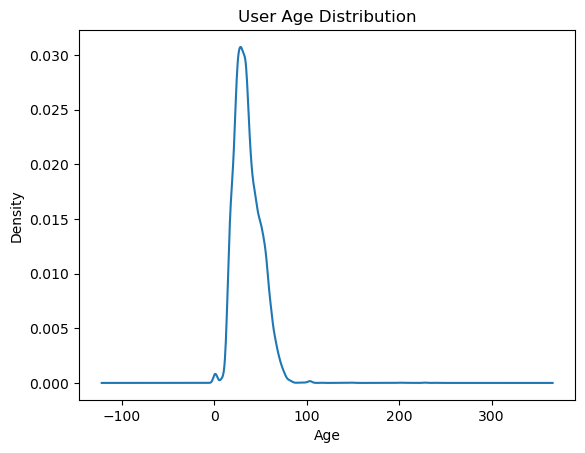

In [24]:
users["User-Age"] = users["User-Age"].str.replace('"', "").replace("NaN", pd.NA).astype(float).astype("Int64")

# Display the updated users DataFrame
print(users["User-Age"])

users['User-Age'].plot(kind='density')
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


### 2.2.2. Filling in missing values for User-Age

**1️⃣**Mean and standard deviation before adjustment

In [25]:
mean_age = users['User-Age'].mean(skipna=True)
std_age = users['User-Age'].std(skipna=True)
print(mean_age, "\n", std_age)

36.20008889800663 
 14.603027520568833


**2️⃣**Stochastic padding based on normal distribution

In [26]:
# 对缺失值填充符合原有数据分布的随机值
np.random.seed(42)  # 设置随机种子以确保结果的可重复性
users['User-Age'] = users['User-Age'].apply(lambda x: np.random.normal(mean_age, std_age) if pd.isna(x) else x)

**3️⃣**Adjusted mean and standard deviation

In [27]:
mean_age = users['User-Age'].mean(skipna=True)
std_age = users['User-Age'].std(skipna=True)
print(mean_age, "\n", std_age)

36.230992789786555 
 14.618844516053535


**4️⃣**Adjustment results

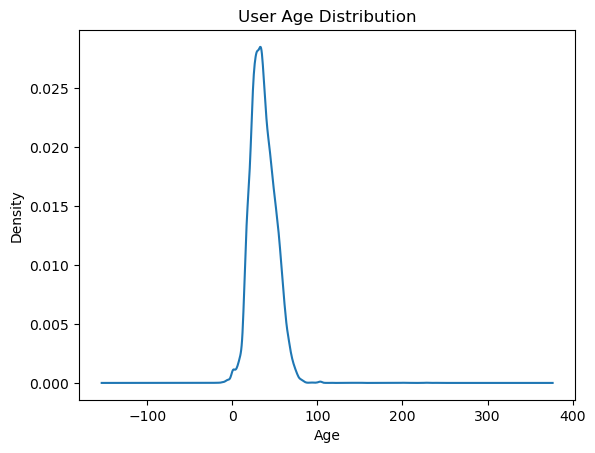

In [28]:
users['User-Age'].plot(kind='density')
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


### 2.2.3. Handling outliers in User-Age

🤪Uniformly set at 99 for ages greater than 100 and 1 for ages less than 0

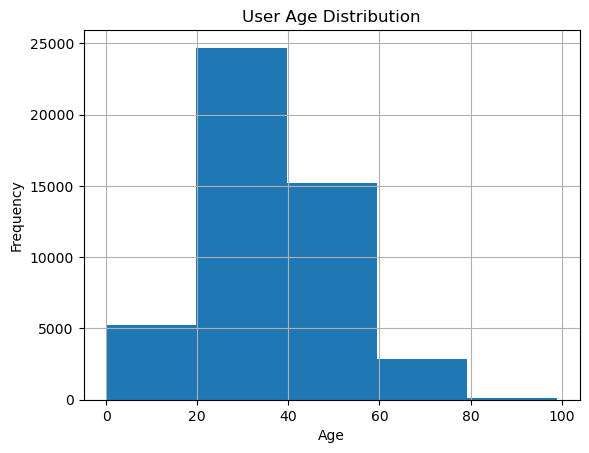

In [29]:
# 使用clip方法限制年龄上限为100
users['User-Age'] = users['User-Age'].apply(lambda x: 99 if x >= 100 else (1 if x <= 0 else x))

users['User-Age'].hist(bins=5)
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### 2.2.4. Binning User-Age

**1️⃣**Define new binning and labelling

In [30]:
bins = list(range(0, 101, 5))  
labels = list(range(1, 21))  

**2️⃣**Binning the age

<Axes: xlabel='User-Age-Binned'>

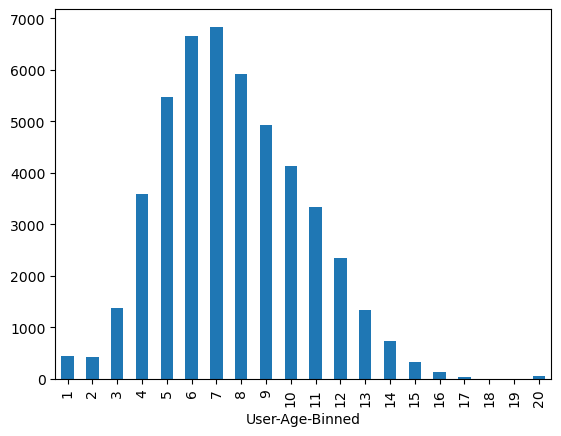

In [31]:
users["User-Age-Binned"] = pd.cut(users["User-Age"], 
                                  bins=bins, 
                                  labels=labels, 
                                  include_lowest=True)

users["User-Age-Binned"].value_counts().sort_index().plot(kind='bar')

## 2.3. Merge & Scaling

In [32]:
scaler = StandardScaler()
users[['User-Age-Binned', 'User-Location-Encoded']] = scaler.fit_transform(users[['User-Age-Binned', 'User-Location-Encoded']])

users_cleaned = users.drop(columns=['User-Location', 'User-Age'])
# 显示修改后的 DataFrame 的前几行
display(users_cleaned.head())

,User-ID,User-Location-Encoded,User-Age-Binned
0,8,-1.991200,0.461292
1,9,0.982708,-0.238173
2,16,0.660236,0.811025
3,17,1.054368,1.510490
4,19,0.875217,-1.637104


⚠️The User-ID can't be deleted here because it's still needed as a Primary Key to connect to the Ratings table.

# 3. Preprocessing Books

In [33]:
display(books.sample(5))

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher
5159,0670894605,The Secret Life of Bees,Sue Monk Kidd,2002,Viking Books
5539,0140434941,David Copperfield (Penguin Classics),Charles Dickens,1997,Penguin Books
4977,0440150167,Love and War,John Jakes,1985,Dell Publishing Company
13235,8845247007,Il Diavolo E La Signorina Prym,Paulo Coelho,0,Fabbri - RCS Libri
2423,0375507523,Bushwhacked : Life in George W. Bush's America,MOLLY IVINS,2003,Random House


## 3.1. Preprocessing Year-Of-Publication

### 3.1.1. Handling of Outliers

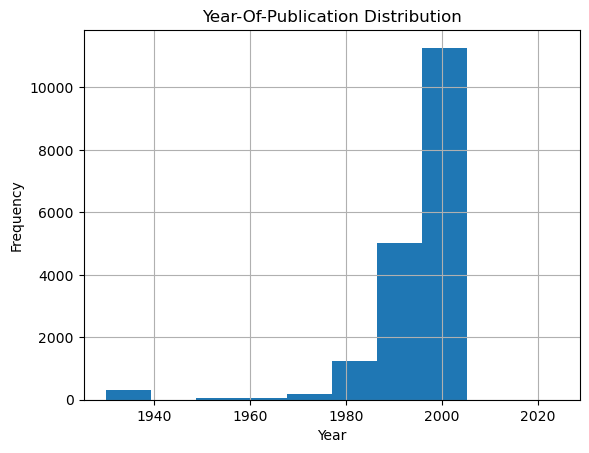

In [34]:
# Publication years earlier than 1930 are counted as 1930 and those older than 2024 are counted as 2024.
books["Year-Of-Publication"] = books["Year-Of-Publication"].clip(upper=2024, lower=1930)

books["Year-Of-Publication"].hist(bins=10)
plt.title('Year-Of-Publication Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

### 3.1.2. Binning Year-Of-Publication

In [35]:
bins = [1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
books["Year-Of-Publication-Binned"] = pd.cut(books["Year-Of-Publication"], bins=bins, right=False)

books[['Year-Of-Publication', 'Year-Of-Publication-Binned']].sample(5)

,Year-Of-Publication,Year-Of-Publication-Binned
16335,1999,"[1990, 2000)"
7500,1993,"[1990, 2000)"
15151,2002,"[2000, 2010)"
5731,1995,"[1990, 2000)"
16226,2000,"[2000, 2010)"


### 3.1.2. Encoding Year-Of-Publication-Binned

In [36]:
ordinal_encoder = OrdinalEncoder()

# 将输入重塑为二维数组
encoded_values = ordinal_encoder.fit_transform(books['Year-Of-Publication-Binned'].values.reshape(-1, 1))

books['Year-Of-Publication-Binned'] = encoded_values
books[['Year-Of-Publication', 'Year-Of-Publication-Binned']].sample(5)

,Year-Of-Publication,Year-Of-Publication-Binned
2555,2002,7.0
11893,1998,6.0
16472,2003,7.0
10054,1987,5.0
16233,1995,6.0


## 3.2. Encoding Publisher & Author

In [37]:
ordinal_encoder = OrdinalEncoder()
# 对书籍的作者名称进行编码
books['Book-Author-Encoded'] = ordinal_encoder.fit_transform(books['Book-Author'].values.reshape(-1, 1))
# 对书籍的出版社名称进行编码
books['Book-Publisher-Encoded'] = ordinal_encoder.fit_transform(books['Book-Publisher'].values.reshape(-1, 1))
books.sample(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Year-Of-Publication-Binned,Book-Author-Encoded,Book-Publisher-Encoded
6741,0517576988,Backlash: The Undeclared War Against American ...,Susan Faludi,1991,Random House Inc,6.0,5839.0,970.0
13095,0679750789,The Tightwad Gazette II: Promoting Thrift As a...,Amy Dacyczyn,1995,Random House Inc,6.0,234.0,970.0
12066,0380015676,Strong Poison,Dorothy L. Sayers,1985,Harper Mass Market Paperbacks (Mm),5.0,1582.0,508.0


## 3.3. Book-Title Preprocessing

⚠️Distinguished from other textual data, Book-Title has a distinct meaning that profoundly affects the operation of the recommender system. So I used some advanced NLP methods here

In [38]:
print("Titles:", len(set(books['Book-Title'])))

Titles: 16135


💪Due to the wide variety of Book-Titles, the spacy library is used for more complex processing.

### 3.3.1. Cleaning the titles

We use advanced🚀method in `spacy`

remember👀:

```terminal
pip install spacy
python -m spacy download en_core_web_sm  # this is to download ENGLISH processing model
```


In [39]:
# 加载英语NLP模型
nlp = spacy.load('en_core_web_sm')
def preprocess_text_spacy(text):
    # 使用SpaCy处理文本
    doc = nlp(text.lower())  # 转换为小写并处理文本
    # 生成不包含停用词和标点的词形还原形式的列表
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    # 将处理后的单词重新组合为字符串
    clean_text = ' '.join(tokens)
    return clean_text
books['Book-Title'] = books['Book-Title'].apply(preprocess_text_spacy)
books['Book-Title']


0                                             clara callan
1        flu story great influenza pandemic 1918 search...
2                                         kitchen god wife
3                                                testament
4                       beloved plume contemporary fiction
                               ...                        
18180                                             love etc
18181                           wit whimsy mary engelbreit
18182                               los detective salvajes
18183                             ice house tv tie edition
18184          trouble business vintage crime black lizard
Name: Book-Title, Length: 18185, dtype: object

### 3.3.2. Creating Word Cloud

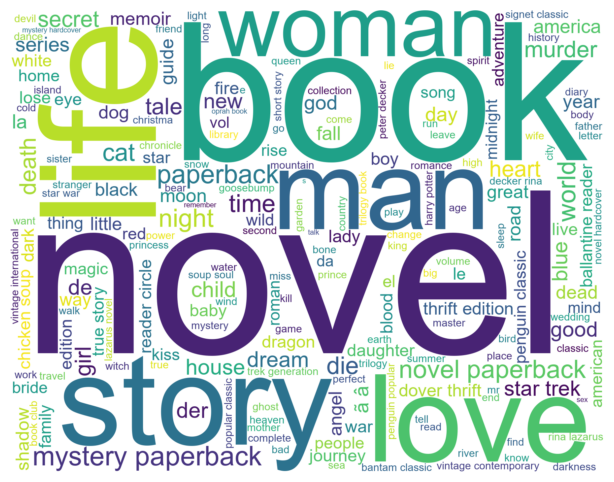

In [40]:
# 创建词云对象
wordcloud = WordCloud(
    width=1800, 
    height=1400, 
    background_color='white',
    font_path='Fonts/arial.TTF'  # 指定字体路径
    ).generate(' ' .join(books['Book-Title']))

# 使用matplotlib绘制词云
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 不显示坐标轴
plt.show()

### 3.3.3. Word➡️Vector: BERT based method

We use BERT model, the strongest🚀 NLP(Natural Languange Processing) Model, which based on Transformer and includes the TF-IDF method

<font color='red'>**More about Transformer/BERT😍**</font>

```bibtex
[1]Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., ... & Polosukhin, I. (2017). Attention is all you need. Advances in neural information processing systems, 30.

[2]Devlin, J., Chang, M. W., Lee, K., & Toutanova, K. (2018). Bert: Pre-training of deep bidirectional transformers for language understanding. arXiv preprint arXiv:1810.04805.

```



#### 3.3.3.1. Load pretrained model

In [41]:
# 加载预训练的BERT分词器和模型
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

#### 3.3.3.2. Trying to move the pretrained model to GPU

1. Aimed to accelerate⚡the training process

2. If you use Apple device or AMD GPU, just ignore.🚫

In [42]:
# 确定设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

device

device(type='cpu')

#### 3.3.3.3. Traning Model

In [43]:
def Preprocess_title_vector_train(tokenizer, model, texts):
    # 将文本批量编码
    encoded_input = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=64).to(device)
    # 使用BERT模型
    with torch.no_grad():
        output = model(**encoded_input)
    # 获取隐藏状态的平均值
    sentence_embeddings = torch.mean(output.last_hidden_state, dim=1)
    return sentence_embeddings.cpu()

#### 3.3.3.4. Batch text processing (acceleration)

Takes fucking long time👿 (5min), have a cup of coffee my friend☕

(If do not apply Batch processing, even takes more than 30mins😂)

In [44]:
# 批量处理文本
batch_size = 32 
all_embeddings = []

# 使用批量处理而非逐个处理
for i in range(0, len(books['Book-Title']), batch_size):
    batch_titles = books['Book-Title'][i:i+batch_size].tolist()
    # 确保传递tokenizer, model, device到函数
    embeddings = Preprocess_title_vector_train(tokenizer, model, batch_titles)
    all_embeddings.extend(embeddings.numpy())  # 将tensor转换为numpy数组并存储

# 将嵌入结果保存到DataFrame中
books['Book-Title-Embeddings'] = all_embeddings
books['Book-Title-Embeddings']

0        [-0.123367414, 0.08614842, 0.16170923, -0.0326...
1        [0.26721457, -0.037141554, 0.038198493, -0.233...
2        [0.100275226, -0.026717773, 0.12962717, 0.0011...
3        [-0.45583922, -0.13625537, 0.16664927, -0.3311...
4        [0.09811925, -0.017514344, 0.13681182, -0.0188...
                               ...                        
18180    [-0.014118507, -0.16303538, 0.1871479, 0.11415...
18181    [0.06956666, -0.023308061, 0.25291815, 0.00722...
18182    [-0.075032696, -0.2976875, -0.023490418, 0.268...
18183    [-0.019509804, -0.75262487, 0.45160484, 0.3689...
18184    [0.29154196, -0.042590592, -0.112933084, 0.124...
Name: Book-Title-Embeddings, Length: 18185, dtype: object

### 3.3.4. Vector Dimension Reduction: UMAP Baesd

🥰For the high-dimensional vectors obtained by BERT processing, UMAP is better than PCA.

🌱Remember: pip install umap-learn

In [45]:
# 设置UMAP参数
reducer = umap.UMAP(n_neighbors=15, n_components=1, metric='cosine')
# 假设`bert_embeddings`是存储在DataFrame中的BERT嵌入向量
bert_embeddings = np.array(books['Book-Title-Embeddings'].tolist())
# 使用UMAP进行降维
embedding = reducer.fit_transform(bert_embeddings)
# 从列表中提取单个数值，并将其转换为数值类型
embedding_values = [value[0] for value in embedding]
embedding_values = np.array(embedding_values)
# 更新DataFrame中的列，将降维后的数值保存到'Book-Title-Embeddings'
books['Book-Title-Embeddings'] = embedding_values
# 如果需要检查或操作降维后的数值，可以如此访问：
print(books['Book-Title-Embeddings'].head())

0    20.078470
1     7.563434
2    11.148304
3    16.413679
4     5.568898
Name: Book-Title-Embeddings, dtype: float32


⚠️Due to the characteristics of random initialisation and batch processing, BERT's training results can vary greatly each time, but this does not affect subsequent classification and regression

## 3.4. Merge & Scaling

In [46]:
# Select columns to be scaled
columns_to_scale = [
    'Year-Of-Publication-Binned', 
    'Book-Author-Encoded', 
    'Book-Publisher-Encoded',
    'Book-Title-Embeddings'
]
# Initialize the scaler
scaler = StandardScaler()
# Apply the scaler only to the specified columns
books_scaled = scaler.fit_transform(books[columns_to_scale])
# Convert the scaled data back to a DataFrame
books_scaled = pd.DataFrame(books_scaled, columns=columns_to_scale)
# Merge the unscaled column back into the DataFrame
books_cleaned = pd.concat([books_scaled, books['ISBN'].reset_index(drop=True)], axis=1)
# Display the first few rows of the modified DataFrame
display(books_cleaned.head())

,Year-Of-Publication-Binned,Book-Author-Encoded,Book-Publisher-Encoded,Book-Title-Embeddings,ISBN
0,0.805577,1.015915,-0.341609,1.413804,0002005018
1,-0.078196,-0.598266,-0.625418,-0.283957,0374157065
2,-0.078196,-1.628969,0.710440,0.202358,0399135782
3,-0.078196,-0.112035,-0.916566,0.916647,0440234743
4,-0.078196,1.519245,0.607682,-0.554531,0452264464


⚠️The ISBN can't be deleted here because it's still needed as a Primary Key to connect to the Ratings table.

# 4. Preprocessing Ratings

## 4.1. Ratings Data

In [47]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276744,038550120X,7
1,276754,0684867621,8
2,276755,0451166892,5
3,276762,0380711524,5
4,276772,0553572369,7


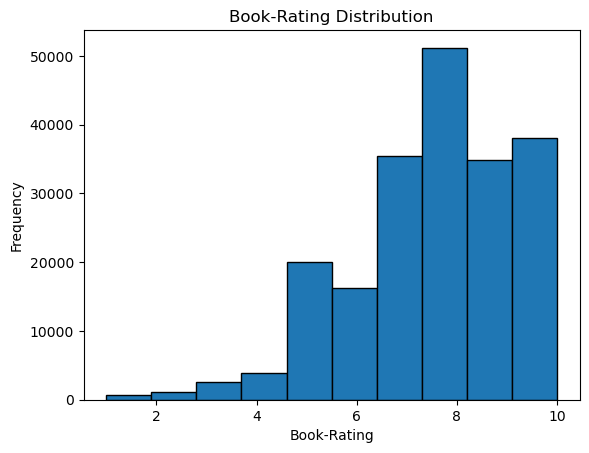

In [48]:
plt.hist(ratings['Book-Rating'], bins=10, edgecolor='black')
plt.title('Book-Rating Distribution')
plt.xlabel('Book-Rating')
plt.ylabel('Frequency')
plt.show()

## 4.2. Cut the Low Ratings

Let all ratings from 1-5 be grouped as a 5

Otherwise.......

<img src="https://s2.loli.net/2024/05/02/1wFIymglAcDWtin.png" alt="image-20240502021029530" style="zoom: 50%;" />

In [49]:
ratings.loc[ratings['Book-Rating'] <= 5, 'Book-Rating'] = 5
ratings_cleaned = ratings
ratings.head()

,User-ID,ISBN,Book-Rating
0,276744,038550120X,7
1,276754,0684867621,8
2,276755,0451166892,5
3,276762,0380711524,5
4,276772,0553572369,7


⚠️The ISBN and User-ID can't be deleted here because they are still needed as composite keys to join with the Ratings table.

# 5. For All the Data: Merge & Review

## 5.1. Merge

**1️⃣**What to be merged

In [50]:
display(users_cleaned.head())
display(books_cleaned.head())
display(ratings_cleaned.head())

,User-ID,User-Location-Encoded,User-Age-Binned
0,8,-1.991200,0.461292
1,9,0.982708,-0.238173
2,16,0.660236,0.811025
3,17,1.054368,1.510490
4,19,0.875217,-1.637104


,Year-Of-Publication-Binned,Book-Author-Encoded,Book-Publisher-Encoded,Book-Title-Embeddings,ISBN
0,0.805577,1.015915,-0.341609,1.413804,0002005018
1,-0.078196,-0.598266,-0.625418,-0.283957,0374157065
2,-0.078196,-1.628969,0.710440,0.202358,0399135782
3,-0.078196,-0.112035,-0.916566,0.916647,0440234743
4,-0.078196,1.519245,0.607682,-0.554531,0452264464


,User-ID,ISBN,Book-Rating
0,276744,038550120X,7
1,276754,0684867621,8
2,276755,0451166892,5
3,276762,0380711524,5
4,276772,0553572369,7


**2️⃣**Merge

In [51]:
# 首先，根据 'ISBN' 合并 ratings_cleaned 和 books_cleaned
merged_data = pd.merge(ratings_cleaned, books_cleaned, on='ISBN', how='inner')
# 然后，根据 'User-ID' 合并新的 merged_data 与 users_cleaned
merged_data = pd.merge(merged_data, users_cleaned, on='User-ID', how='inner')
# 确保 merged_data 只包含所需的列
merged_data = merged_data[['Book-Rating', 'Year-Of-Publication-Binned',
                           'Book-Author-Encoded', 'Book-Publisher-Encoded', 'Book-Title-Embeddings',
                           'User-Age-Binned', 'User-Location-Encoded']]
# 现在 merged_data 包含了所需的所有列
display(merged_data.head())

,Book-Rating,Year-Of-Publication-Binned,Book-Author-Encoded,Book-Publisher-Encoded,Book-Title-Embeddings,User-Age-Binned,User-Location-Encoded
0,7,0.805577,-0.391484,-0.823595,0.539661,-0.937638,-0.020538
1,8,-0.078196,1.321546,0.979569,-0.494499,-1.287371,-2.062860
2,5,-0.078196,0.113449,1.026055,0.465378,-0.238173,-1.489577
3,5,-0.078196,-0.029215,-1.388765,1.340071,-0.937638,-1.525407
4,7,-0.078196,0.953400,-1.344726,-1.174113,0.811025,-1.525407


## 5.2. Correlation

### 5.2.1. Linear relationship correlation (Pearson)

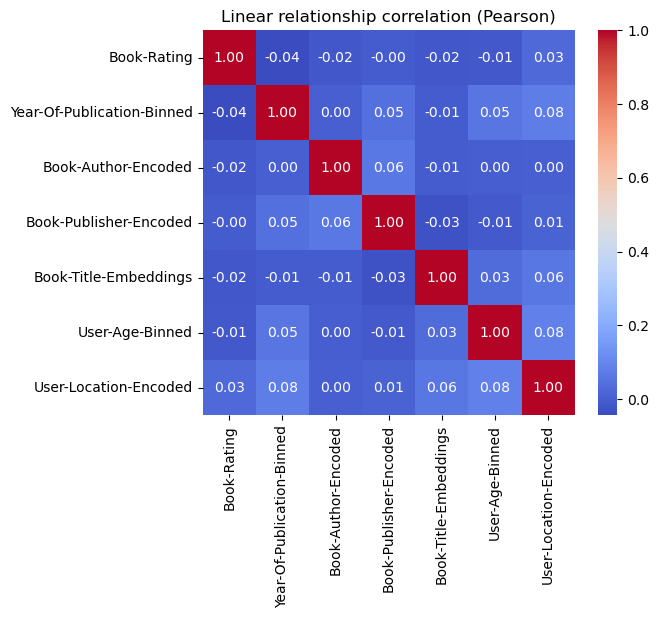

In [52]:
X = merged_data
pearson_corr_matrix = X.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Linear relationship correlation (Pearson)')
plt.show()

### 5.2.2. Non-linear relationship correlation (Mutual Information)

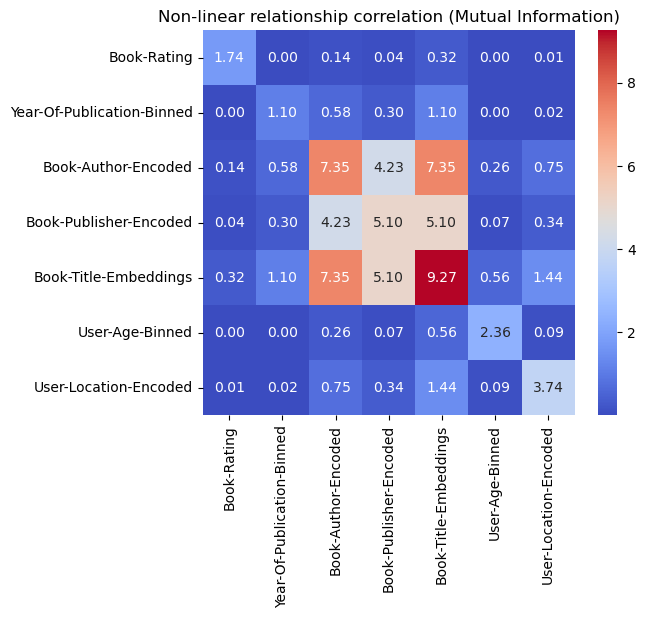

In [53]:
X = merged_data
# Create an empty DataFrame to store mutual information values
mi_matrix = pd.DataFrame(index=X.columns, columns=X.columns, dtype=float)
# Calculate mutual information for each pair of features
for column_i in X.columns:
    for column_j in X.columns:
        mi_matrix.loc[column_i, column_j] = mutual_info_score(X[column_i], X[column_j])
# The mutual information matrix is symmetric; enhance symmetry by averaging the matrix with its transpose
mi_matrix = (mi_matrix + mi_matrix.T) / 2
# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(mi_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Non-linear relationship correlation (Mutual Information)')
plt.show()